### 1. Loading the Libraries

In [1]:
%%time

import pandas as pd
import numpy as np

#import matplotlib.pyplot as plt

#%matplotlib inline
#from tensorflow.python.keras import models, layers, optimizers
#import tensorflow
#from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
#from tensorflow.keras.preprocessing.sequence import pad_sequences
      
import bz2

#from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

import re

Wall time: 3.75 s


### 2. Creating Function to load text and labels from train and test set

In [2]:
%%time

def get_labels_and_texts(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    return np.array(labels), texts
train_labels, train_texts = get_labels_and_texts('train.ft.txt.bz2')
test_labels, test_texts = get_labels_and_texts('test.ft.txt.bz2')


Wall time: 3min 50s


In [3]:
train_labels[0]

1

In [4]:
train_texts[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [5]:
train_labels=train_labels[0:100000]

In [6]:
train_texts=train_texts[0:100000]

In [7]:
test_labels=test_labels[0:25000]

In [8]:
test_texts=test_texts[0:25000]

### 3. Text Pre-processing

In [9]:
%%time

import re

NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r' ', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts

train_texts = normalize_texts(train_texts)
test_texts = normalize_texts(test_texts)

Wall time: 14.4 s


In [10]:
train_texts[15]

'don t try to fool us with fake reviews   it s glaringly obvious that all of the glowing reviews have been written by the same person  perhaps the author herself  they all have the same misspellings and poor sentence structure that is featured in the book  who made veronica haddon think she is an author '

### 4. Count-Vectorisation

In [11]:
%%time

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary = True)
cv.fit(train_texts)
X = cv.transform(train_texts)
X_test = cv.transform(test_texts)

Wall time: 1min 11s


In [12]:
X_test

<25000x105396 sparse matrix of type '<class 'numpy.int64'>'
	with 1378117 stored elements in Compressed Sparse Row format>

In [13]:
cv.get_feature_names()[:50]

['00',
 '000',
 '0000',
 '0000000',
 '00000000001',
 '00001',
 '0000amazing',
 '0000custom',
 '0001',
 '000ap',
 '000big',
 '000e',
 '000es',
 '000f',
 '000fortunately',
 '000ft',
 '000gw',
 '000iu',
 '000lb',
 '000mah',
 '000recipient',
 '000rms',
 '000s',
 '000t',
 '000u',
 '000x',
 '000years',
 '001',
 '001i',
 '001past',
 '001yes',
 '00a',
 '00am',
 '00amp',
 '00an',
 '00another',
 '00b',
 '00beve',
 '00bevs',
 '00bg',
 '00bt',
 '00diapers',
 '00dpi',
 '00dv',
 '00dvd',
 '00ea',
 '00early',
 '00f',
 '00fps',
 '00g']

In [14]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, train_labels, train_size = 0.75)


for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print("Accuracy for C=%s: %s"
          % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.87724


C:\Users\rrous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.05: 0.88832


C:\Users\rrous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.25: 0.89076


C:\Users\rrous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.88736
Accuracy for C=1: 0.88388
Wall time: 48.1 s


C:\Users\rrous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
y_score = lr.decision_function(X_val)

In [16]:
%%time

predict = lr.predict(X_test)

Wall time: 11.9 ms


In [17]:
predict.shape

(25000,)

In [18]:
test_labels[0]

1

In [19]:
X_test.shape

(25000, 105396)

In [20]:
train_texts[0]

'stuning even for the non gamer  this sound track was beautiful  it paints the senery in your mind so well i would recomend it even to people who hate vid  game music  i have played the game chrono cross but out of all of the games i have ever played it has the best music  it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras  it would impress anyone who cares to listen     '

### 5. Precision Score

In [21]:
#compute precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val,y_score )

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.95


### 6. Precision vs Recall Graph

In [22]:
#plotting the graphs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Text(0.5, 1.0, 'CountVect Precision-Recall curve: AP=0.95')

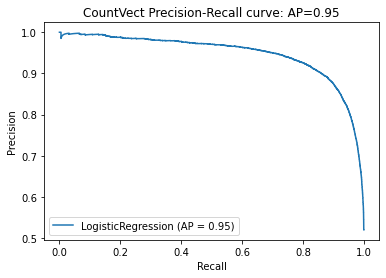

In [23]:
disp = plot_precision_recall_curve(lr, X_val, y_val)
disp.ax_.set_title('CountVect Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [24]:
X.shape

(100000, 105396)

In [25]:
train_labels

array([1, 1, 1, ..., 0, 0, 0])

### 7. ROC Curve

In [26]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

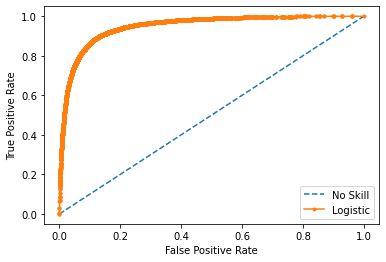

In [27]:
X, train_lables = make_classification(n_samples=50000, n_classes=2, random_state=1)

yhat = lr.predict_proba(X_val)

pos_probs = yhat[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, pos_probs)


plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

fpr, tpr, _ = roc_curve(y_val, pos_probs)

plt.plot(fpr, tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### 8. F1 Score

In [28]:
from sklearn.metrics import f1_score

In [29]:
score = lr.score(X_val, y_val)

print("Logistic Regression F1 score: {:.2f}".format(score))

Logistic Regression F1 score: 0.88


### 9. Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

[[5850 6393]
 [6158 6599]]


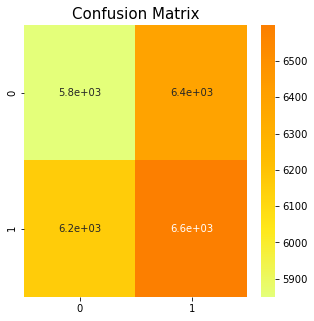

In [31]:
plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_val, predict)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix', fontsize = 15)
print(cm)